## knolpy 설치

In [3]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 106.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 43.0 MB/s eta 0:00:00


## 데이터 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/ml/data/text_mining/'
train_df = pd.read_csv(DATA_PATH + 'ratings_train.txt', sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [7]:
train_df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [8]:
import re

train_df = train_df.fillna(' ')

# 테스트 데이터 셋을 로딩하고 동일하게 Null 및 숫자를 공백으로 변환

test_df = pd.read_csv(DATA_PATH + 'ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )

In [9]:
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

## 워드 클라우드

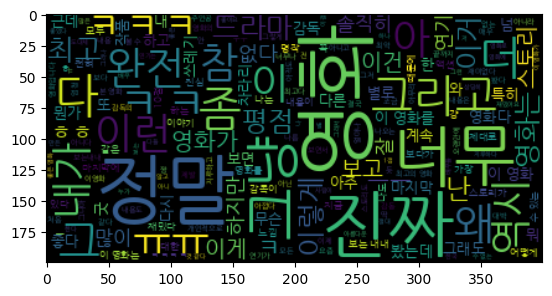

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

train_review = [review for review in train_df['document'] if type(review) is str]
wordcloud = WordCloud(font_path = DATA_PATH + 'NanumGothic.ttf').generate(' '.join(train_review))
plt.imshow(wordcloud, interpolation = 'bilinear')

In [20]:
from konlpy.tag import Twitter
twitter = Twitter()
def tw_tokenizer(text):

  # 입력 인자로 들어오는 Text 를 형태소 단어로 토큰화하여 list 객체 반환
  tokens_ko = twitter.morphs(text)
  return tokens_ko


/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs( ) 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [24]:
lg_clf = LogisticRegression(random_state = 0, solver = 'liblinear')
params = {'C':[1,3,5,4,5]}
grid_cv = GridSearchCV(lg_clf, param_grid = params, cv = 3, scoring = 'accuracy', verbose = 1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_,4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 3} 0.863
